AS.430.271.81: M05 - Adam Thomas

# M05 Homework

## Information Gain - Entropy

In [1]:
# From docs here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html
import numpy as np
from scipy.stats import entropy
base = 2  # work in units of bits

Compute H([9,4])

In [2]:
entropy(np.array([9, 4]), base=base)

0.8904916402194913

Compute H([3,3])

In [3]:
entropy(np.array([3, 3]), base=base)

1.0

## sklearn LabelEncoder

In [4]:
from sklearn import preprocessing

In [5]:
import pandas as pd
import graphviz
from sklearn import model_selection, tree, metrics

Read the downloaded car data. Since there is no header to the data, we will assign explicitly column names.

In [6]:
df = pd.read_csv('car.data', names=['buying','maint','doors','persons','lug_boot','safety','clazz'])
df.head()

,buying,maint,doors,persons,lug_boot,safety,clazz
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


Check the data size and types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   clazz     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


Use LabelEncoder **fit_transform** from https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
to convert object classes to integer classes

In [8]:
le = preprocessing.LabelEncoder()

In [9]:
df.buying = le.fit_transform(df.buying)
df.maint = le.fit_transform(df.maint)
df.doors = le.fit_transform(df.doors)
df.persons = le.fit_transform(df.persons)
df.lug_boot = le.fit_transform(df.lug_boot)
df.safety = le.fit_transform(df.safety)
clazz_names = pd.unique(df.clazz) # Note here, I'm saving the names for later use !
df.clazz = le.fit_transform(df.clazz)
df.head()

,buying,maint,doors,persons,lug_boot,safety,clazz
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [10]:
clazz_names

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

Extract independent (X) and dependent (y) variables.

In [11]:
X = df.iloc[:,:-1]  # Everything but the last column
y = df.iloc[:,-1]  # The last column

Create training (80%) and validation data (20%)

In [12]:
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

Create a decision tree classifier using 'gini' method for information gain and set the max tree depth to 3.

In [13]:
dtc = tree.DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

In [14]:
dtc = dtc.fit(X_train, y_train)

Let's see how well we did

In [15]:
y_pred = dtc.predict(X_valid)
metrics.accuracy_score(y_pred, y_valid)

0.7427745664739884

Let's visualize the tree

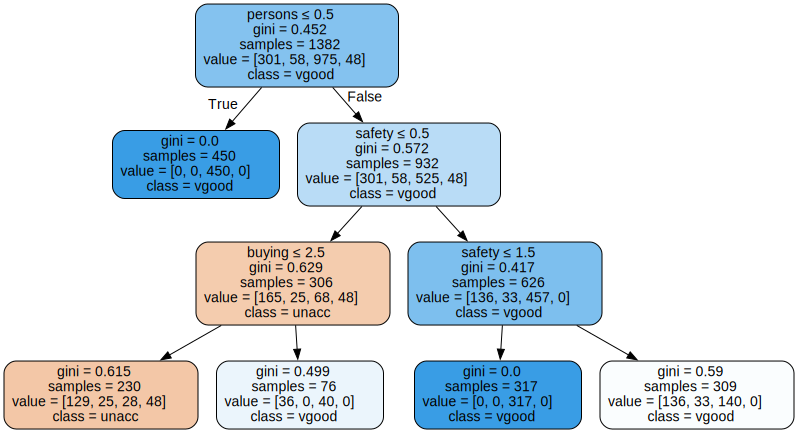

In [16]:
dot_data = tree.export_graphviz(dtc,
                                out_file=None,
                                feature_names=X.columns,
                                class_names=clazz_names,
                                filled=True,
                                rounded=True,
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

## Adjust the classifier parameters
Adjust the classifier parameters from above to see if we can improve the accuracy.

Create a decision tree classifier using 'entropy' method and set the max tree depth to 4.

In [17]:
dtc = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
dtc = dtc.fit(X_train, y_train)

Let's see how well we did

In [18]:
y_pred = dtc.predict(X_valid)
metrics.accuracy_score(y_pred, y_valid)

0.8236994219653179

Let's visualize the tree

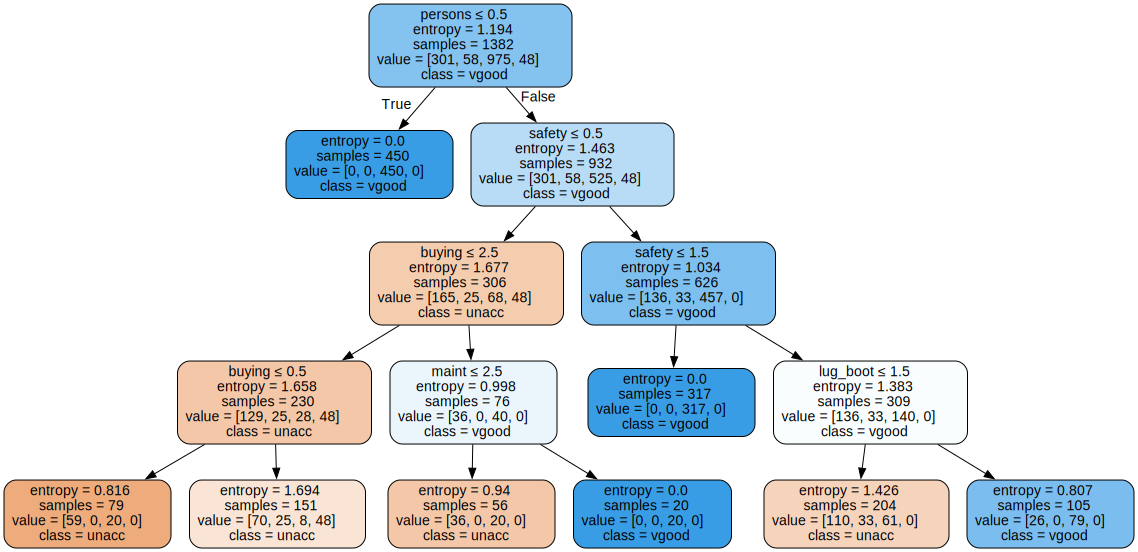

In [19]:
dot_data = tree.export_graphviz(dtc,
                                out_file=None,
                                feature_names=X.columns,
                                class_names=clazz_names,
                                filled=True,
                                rounded=True,
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

This resulted in an accuracy increase from **0.7427745664739884** to **0.8236994219653179**

Based on the graph above, this indicates that the classes 'acc' and 'good' do not seem to be impacted by the independent variables. I.e. Of all the decisions made in the tree, the results either end up as class 'unacc' or 'vgood'.